In [1]:
# General libraries
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

# Scikit Learn libraries
from sklearn.model_selection import train_test_split

# Utils functions
from utils.utils import compare_models, plot_score_dist, compare_confidence_intervals, five_two

In [2]:
data_folder_path = '../data/'

data_path = data_folder_path + 'complex_processed_data.csv'
standardized_data_path = data_folder_path + 'complex_processed_standardized_data.csv'
standardized_poutliers_removed_data_path = data_folder_path + 'complex_processed_standardized_outliers_removed_data.csv'

df_solubility = pd.read_csv(standardized_data_path)

In [3]:
# Split dataset into X and Y for machine learning

df_sol_X = df_solubility.copy()
df_sol_X.drop(columns=['solubility'], axis=1, inplace=True)

df_sol_y = df_solubility[['solubility']]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
                        df_sol_X, df_sol_y, 
                        train_size = 0.8,
                        test_size = 0.2,
                        random_state = 10
                        )

In [5]:
def load_model(model):
    models_folder = '../models/'
    return joblib.load(models_folder + model + '_model.joblib')

In [6]:
#1000 to 10.000 did not show significative differences
#size 2270 based on the paper: https://www.econstor.eu/bitstream/10419/67820/1/587473266.pdf
random_state_list = list(np.random.randint(low = 1,high=5000,size=2270))

## Linear Regression VS SVR

In [7]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = -0.022542
Fold  2 score difference = -0.224828
Fold  1 score difference = -0.194397
Fold  2 score difference = -0.140636
Fold  1 score difference = -0.194014
Fold  2 score difference = -0.135613
Fold  1 score difference = -0.108558
Fold  2 score difference = -0.142868
Fold  1 score difference = -0.247571
Fold  2 score difference = -0.134340
Regression 1 mean score and stdev : 0.027767 + 0.083745
Regression 2 mean score and stdev : 0.182304 + 0.037843
Score difference mean + stdev : -0.154537 + 0.061136
t_value for the current test is -0.288107


mean_score_1 0.002000529661626446, std 0.11267135404948764
mean_score_2 0.2816481170645967, std 0.06600412955469925
Ttest_relResult(statistic=-123.35476405388154, pvalue=0.0)
P value menor ou igual a 0.05


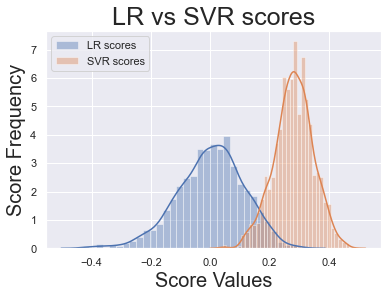

In [8]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)


plot_score_dist(reg1_scores, reg2_scores, 'LR', 'SVR')

In [9]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.7
)

-0.2391689484398709
0.2045102277697145
0.14139092451641305
0.40781429201873776


## Linear Regression VS XGBoost

In [10]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = -0.002084
Fold  2 score difference = -0.180585
Fold  1 score difference = -0.220999
Fold  2 score difference = -0.052770
Fold  1 score difference = -0.183206
Fold  2 score difference = -0.129666
Fold  1 score difference = -0.050650
Fold  2 score difference = -0.085184
Fold  1 score difference = -0.266834
Fold  2 score difference = -0.091134
Regression 1 mean score and stdev : 0.027767 + 0.083745
Regression 2 mean score and stdev : 0.154079 + 0.014613
Score difference mean + stdev : -0.126311 + 0.080250
t_value for the current test is -0.021367


mean_score_1 0.002000529661626446, std 0.11267135404948764
mean_score_2 0.2452192616694011, std 0.0633188308073751
Ttest_relResult(statistic=-140.98984876972642, pvalue=0.0)
P value menor ou igual a 0.05


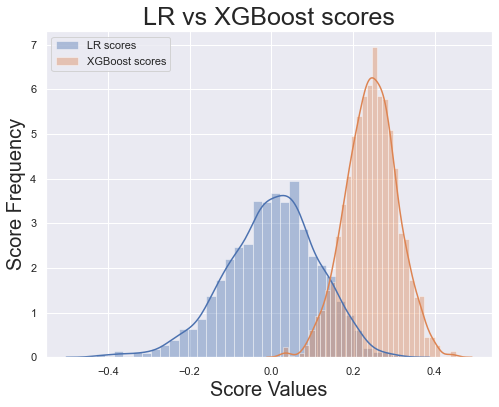

In [11]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'LR', 'XGBoost')

In [12]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.7
)

-0.2391689484398709
0.2045102277697145
0.11816327151619818
0.36920931480777114


## SVR VS XGboost

In [13]:
five_two(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = 0.017213
Fold  2 score difference = 0.043803
Fold  1 score difference = -0.026133
Fold  2 score difference = 0.083786
Fold  1 score difference = 0.010487
Fold  2 score difference = 0.005363
Fold  1 score difference = 0.057560
Fold  2 score difference = 0.056847
Fold  1 score difference = -0.024566
Fold  2 score difference = 0.041859
Regression 1 mean score and stdev : 0.182304 + 0.037843
Regression 2 mean score and stdev : 0.155682 + 0.014026
Score difference mean + stdev : 0.026622 + 0.034453
t_value for the current test is 0.414704


mean_score_1 0.2816481170645967, std 0.06600412955469925
mean_score_2 0.2452192616694011, std 0.0633188308073751
Ttest_relResult(statistic=30.0210577217827, pvalue=4.990020594185943e-167)
P value menor ou igual a 0.05


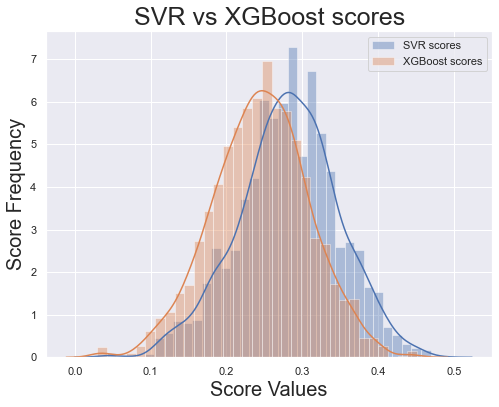

In [14]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'SVR', 'XGBoost')

In [15]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.7
)

0.14139092451641305
0.40781429201873776
0.11816327151619818
0.36920931480777114


mean_score_1 -0.5337783446458612, std 0.14092773607624975
mean_score_2 -0.6115588737329003, std 0.13519426037250362
Ttest_relResult(statistic=30.021057721782697, pvalue=4.990020594187364e-167)
P value menor ou igual a 0.05


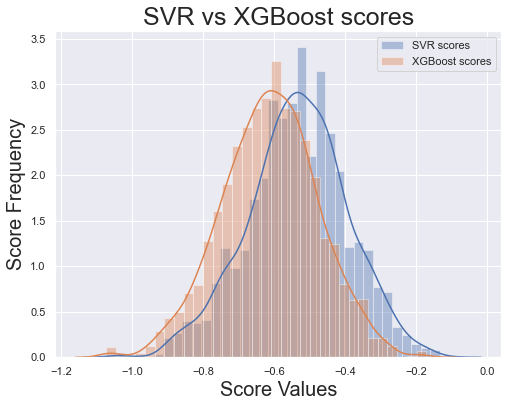

In [16]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    metric="adj_r2",
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'SVR', 'XGBoost')

In [17]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.7
)

-0.8332464044109017
-0.2643965116356681
-0.8828405824383876
-0.3468233548698942
